In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_score
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier

In [24]:
mall = pd.read_csv('Data\Mall_Customers.csv')
mall.sample()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
20,21,Male,35,24,35


In [25]:
mall.rename(columns = {'Annual Income (k$)': 'Annual_Income', 'Spending Score (1-100)': 'Spending_Score'}, inplace = True)
mall.sample()

,CustomerID,Gender,Age,Annual_Income,Spending_Score
185,186,Male,30,99,97


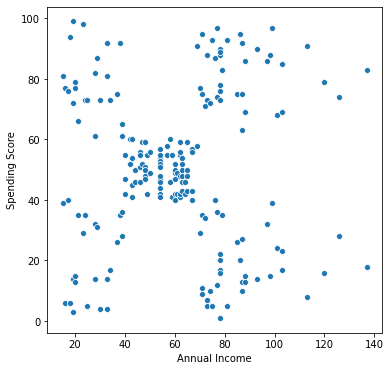

In [26]:
mall_clust = mall[['Annual_Income', 'Spending_Score']]

plt.figure(figsize=(6,6))
sns.scatterplot(x = 'Annual_Income', y = 'Spending_Score', data = mall_clust)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

In [27]:
number_of_cluster = range(2,11)
clusterings = [KMeans(n_clusters = k).fit(mall_clust) for k in number_of_cluster]
centroids = [k.cluster_centers_ for k in clusterings]

D_k = [cdist(mall_clust, cent, 'euclidean') for cent in centroids] 
cIdx = [np.argmin(D, axis = 1) for D in D_k] 
dist = [np.min(D, axis = 1) for D in D_k] 
avg_withinSS = [sum(d)/mall_clust.shape[0] for d in dist] 

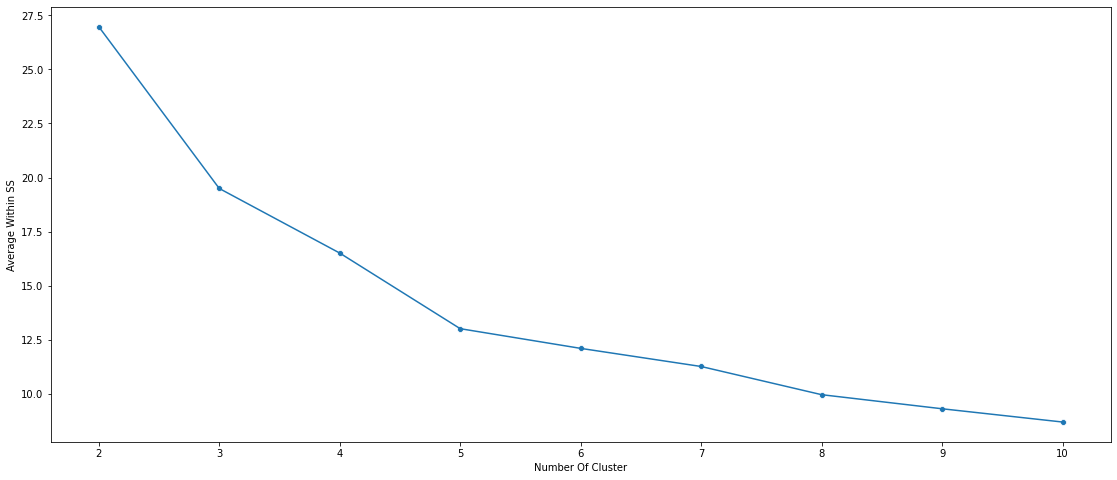

In [28]:
plt.figure(figsize=(19,8))
sns.lineplot(number_of_cluster, avg_withinSS)
sns.scatterplot(number_of_cluster, avg_withinSS)
plt.xticks(number_of_cluster)
plt.xlabel('Number Of Cluster')
plt.ylabel('Average Within SS')
plt.show()

In [29]:
s_score = []

number_of_cluster = range(2,11)

for i in number_of_cluster:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(mall_clust)
    labels = kmeans.labels_
    s_score.append(silhouette_score(mall_clust, labels, metric = 'euclidean'))
    
s_score

[0.2968969162503008,
 0.46761358158775435,
 0.4931963109249047,
 0.553931997444648,
 0.53976103063432,
 0.5270287298101395,
 0.4572211842776841,
 0.4501708256677319,
 0.4467356774401869]

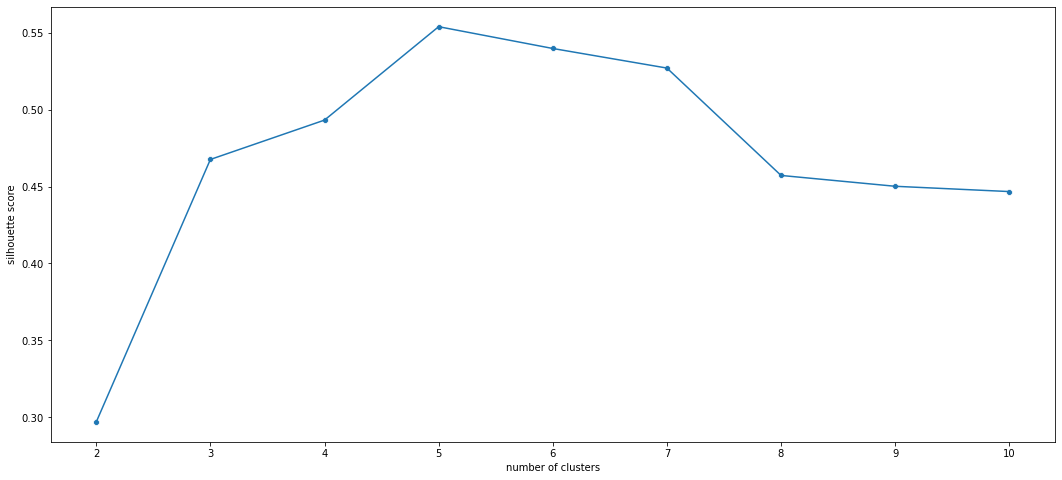

In [30]:
plt.figure(figsize=(18,8))
sns.lineplot(number_of_cluster, s_score)
sns.scatterplot(number_of_cluster, s_score)
plt.xticks(number_of_cluster)
plt.xlabel('number of clusters')
plt.ylabel('silhouette score')
plt.show()

In [31]:
kmeans = KMeans(n_clusters = 5)
kmeans.fit(mall_clust)
data_mall = mall_clust.copy()
data_mall['cluster'] = kmeans.labels_
mall['Outcome'] = kmeans.labels_

In [32]:
mall

,CustomerID,Gender,Age,Annual_Income,Spending_Score,Outcome
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,3
196,197,Female,45,126,28,1
197,198,Male,32,126,74,3
198,199,Male,32,137,18,1


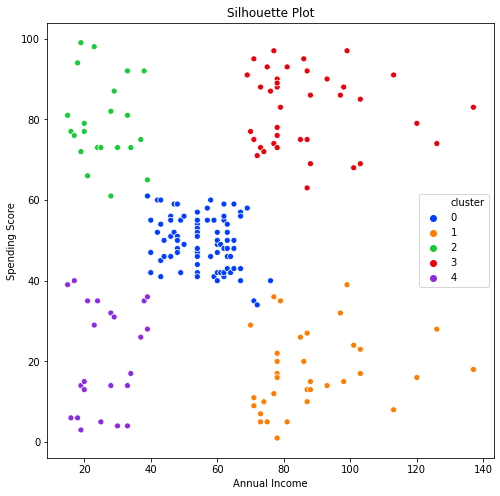

In [33]:
plt.figure(figsize = (8,8))
sns.scatterplot(x = 'Annual_Income', y = 'Spending_Score', data = data_mall, hue = 'cluster', palette = 'bright')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Silhouette Plot')
plt.show()

In [34]:
cluster_name = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4']
color = ['Blue', 'Orange', 'Green', 'Red', 'Purple']
group_list = ['Medium Income VS Medium Spending', 'High Income VS Low Spending', 'High Income  VS High Spending',
            'Low Income VS Low Spending', 'Low Income VS High Spending']
summary = pd.DataFrame({'Color': color, 'Name': cluster_name,
                        'Group': group_list})
summary

,Color,Name,Group
0,Blue,Cluster 0,Medium Income VS Medium Spending
1,Orange,Cluster 1,High Income VS Low Spending
2,Green,Cluster 2,High Income VS High Spending
3,Red,Cluster 3,Low Income VS Low Spending
4,Purple,Cluster 4,Low Income VS High Spending


In [35]:
mall

,CustomerID,Gender,Age,Annual_Income,Spending_Score,Outcome
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,3
196,197,Female,45,126,28,1
197,198,Male,32,126,74,3
198,199,Male,32,137,18,1


In [36]:
X = mall[['Annual_Income', 'Spending_Score']].values
y = mall['Outcome'].values

In [37]:
kf = KFold(n_splits=2, shuffle=True, random_state=1)
fold = []

for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "\n\nTEST:", test_index)
    print("\n\n\n")
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    new = [X_train, X_test, y_train, y_test]
    fold.append(new)

TRAIN: [  0   1   2   3   6   7   8   9  10  15  20  21  22  23  24  25  26  30
  32  37  41  43  46  49  50  52  55  57  60  61  62  63  64  65  68  70
  71  72  74  75  76  77  79  80  83  85  86  87  88  91  92  96 100 101
 104 109 111 112 115 121 125 126 128 129 130 131 133 134 135 137 139 140
 141 142 143 144 145 146 147 149 150 151 152 155 156 157 160 163 164 167
 169 170 175 178 180 182 188 190 192 196] 

TEST: [  4   5  11  12  13  14  16  17  18  19  27  28  29  31  33  34  35  36
  38  39  40  42  44  45  47  48  51  53  54  56  58  59  66  67  69  73
  78  81  82  84  89  90  93  94  95  97  98  99 102 103 105 106 107 108
 110 113 114 116 117 118 119 120 122 123 124 127 132 136 138 148 153 154
 158 159 161 162 165 166 168 171 172 173 174 176 177 179 181 183 184 185
 186 187 189 191 193 194 195 197 198 199]




TRAIN: [  4   5  11  12  13  14  16  17  18  19  27  28  29  31  33  34  35  36
  38  39  40  42  44  45  47  48  51  53  54  56  58  59  66  67  69  73
  78  81  82  

In [38]:
neighbors = np.arange(1,9)
train_accuracy1 =np.empty(len(neighbors))
train_accuracy2 =np.empty(len(neighbors))
test_accuracy1 = np.empty(len(neighbors))
test_accuracy2 = np.empty(len(neighbors))
X_train1, X_test1, y_train1, y_test1 = fold[0]
X_train2, X_test2, y_train2, y_test2 = fold[1]


for i,k in enumerate(neighbors):
    knn1 = KNeighborsClassifier(n_neighbors=k)
    knn2 = KNeighborsClassifier(n_neighbors=k)
    
    knn1.fit(X_train1, y_train1)
    knn2.fit(X_train2, y_train2)
    
    train_accuracy1[i] = knn1.score(X_train1, y_train1)
    train_accuracy2[i] = knn2.score(X_train2, y_train2)
    
    test_accuracy1[i] = knn1.score(X_test1, y_test1) 
    test_accuracy2[i] = knn2.score(X_test2, y_test2) 

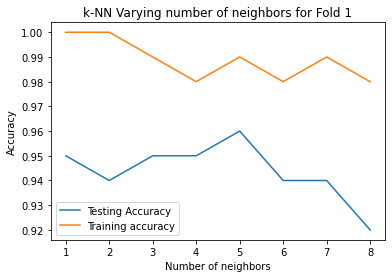

In [39]:
plt.title('k-NN Varying number of neighbors for Fold 1')
plt.plot(neighbors, test_accuracy1, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy1, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

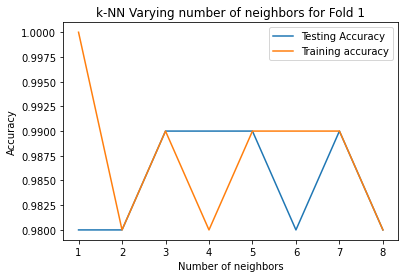

In [40]:
plt.title('k-NN Varying number of neighbors for Fold 1')
plt.plot(neighbors, test_accuracy2, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy2, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [41]:
knn1 = KNeighborsClassifier(n_neighbors=5)
knn2 = KNeighborsClassifier(n_neighbors=5)

knn1.fit(X_train1,y_train1)
knn2.fit(X_train2,y_train2)

print(knn1.score(X_test,y_test), knn2.score(X_test,y_test))

0.99 0.99


In [42]:
y_pred1 = knn1.predict(X_test1)

pd.crosstab(y_test1, y_pred1, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,2,3,4,All
True,,,,,,
0,40,0,0,0,0,40
1,0,16,0,0,0,16
2,1,0,11,0,0,12
3,0,0,0,20,0,20
4,3,0,0,0,9,12
All,44,16,11,20,9,100


In [43]:
y_pred2 = knn2.predict(X_test2)

pd.crosstab(y_test2, y_pred2, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,2,3,4,All
True,,,,,,
0,41,0,0,0,0,41
1,1,18,0,0,0,19
2,0,0,10,0,0,10
3,0,0,0,19,0,19
4,0,0,0,0,11,11
All,42,18,10,19,11,100
